In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import util
from scipy.stats import binned_statistic

# Kennlinien PM3

In [5]:
eta = .03
rt = 506/60
T = 1/eta**2*1/rt
T

131.75230566534913

In [6]:
N=1148
c=N/T
dc=np.sqrt(N)/T
dc/c

0.029514066805047763

## Plot

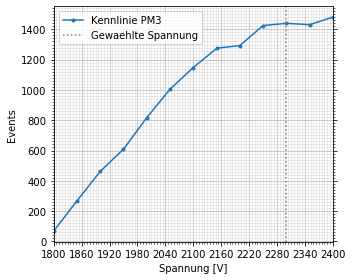

In [25]:
%matplotlib inline
fig, ax = set_up_plot()
calib = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx', sheet_name='Kennl')
ax.set_xlabel('Spannung [V]')
ax.set_ylabel('Events')
ax.plot(calib['U/V'], calib["N123"], marker='.', label='Kennlinie PM3')
ax.axvline(2300, linestyle='dotted', color='gray', label='Gewaehlte Spannung')
ax.legend()
ax.set_xlim([calib['U/V'].min(), calib['U/V'].max()])
save_fig(fig, 'kennlinie_pm3', 'vorversuch')

# Peakhoehen der Photomultiplier

In [110]:
peaks = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx')
peak_labels = ['P1', 'P2', 'P3']
bin_offsets = [8, 15, 40]

In [111]:
peaks['dP1'] = calculate_peak_uncertainty(peaks["P1"])
peaks['dP2'] = calculate_peak_uncertainty(peaks["P2"])
peaks['dP3'] = calculate_peak_uncertainty(peaks["P3"])


In [ ]:
for index, peak in enumerate(peak_labels):
    plot_hist(peaks[peak], calculate_bins(peaks[peak]) + bin_offsets[index], save=(f'muon_{peak}_spec', 'vorversuch'))

In [66]:
peaks['P2']

0       2.4
1       3.0
2       9.8
3      11.2
4     200.0
5       3.0
6       5.6
7       5.4
8       5.0
9       3.6
10      3.2
11      4.2
12      2.4
13      2.2
14      4.6
15      6.4
16      2.6
17      3.4
18      5.2
19      3.4
20      2.4
21      3.4
22      4.4
23      3.0
24      5.8
25      9.0
26      2.6
27      2.0
28      3.6
29      3.4
30      5.2
31      3.6
32      4.2
33      2.4
34      4.4
35      4.2
36      2.8
37      3.2
38      2.8
39      2.6
40      3.2
41      2.8
42      7.4
43      4.4
44      5.2
45      9.0
46      4.2
47      6.2
48      6.4
49     11.4
Name: P2, dtype: float64